<a href="https://colab.research.google.com/github/chihway/cosmology_on_beach_2022/blob/main/Tutorial_1_exploration_of_images_and_catalogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of Images and Catalogs

Time: 

In this tutorial we will be looking at two sets of images and catalogs from: 
* [the Dark Energy Survey Y3 data](https://des.ncsa.illinois.edu/home)
* simulated data from [the Data Challenge 2 (DC2)](https://data.lsstdesc.org/doc/dc2_sim_sky_survey) of the Rubin Observatory Legacy Survey of Space and Time (LSST) Dark Energy Science Collaboration (DESC)

We will learn to
* Open and manipulate images, compare the observational and simulated data
* Open and manipulate catalogs, compare the observational and simulated data
* Estimate depth of a single image

In [15]:
import numpy as np
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [14]:
!pip install pandas

In [16]:
!pip install pyarrow

     |████████████████████████████████| 25.0 MB 3.9 MB/s eta 0:00:01


In [ ]:
!curl -O https://portal.nersc.gov/cfs/chihway/test.txt
!tar -xvzf test

### First let's open a coadd DC2 image

This is an i-band, single-chip image coadded to LSST Y5 depth, post-processed (basic cleaning done, background-removed). The LSST CCD chips are 4200 x 4200 pixels. Let's take a look at what is in the fits files.

In [8]:
dc2_image = pf.open('data/2,2.fits')
#calexp-i-3828-2,2.fits
#2,2.fits

dc2_image.info()

Filename: data/2,2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1                1 CompImageHDU     34   (4200, 4200)   float32   
  2                1 CompImageHDU     49   (4200, 4200)   int32   
  3                1 CompImageHDU     34   (4200, 4200)   float32   
  4                1 BinTableHDU     40   30493R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   25806R x 2C   [64A, 1J]   
  6                1 BinTableHDU     45   46R x 7C   [1X, 1J, 1J, 1J, 1J, 1J, 1D]   
  7                1 BinTableHDU     16   714R x 1C   [1QB(9540)]   
  8                1 BinTableHDU     28   25760R x 4C   [1J, 1J, 1J, 1D]   
  9                1 BinTableHDU     40   12880R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
 10                1 BinTableHDU     20   2800R x 2C   [1D, 1D]   
 11                1 BinTableHDU     40   13441R x 6C   [1J, 1J, 1J, 1J, 1J, 1D]   
 12                1 BinTableHDU  

I have to admit I don't know what all these extensions are, but it's sufficient to know now that there has been a lot of steps going from the raw data to this coadd image, and the intermediate information are stored in these extensions. You can take a look into each extension here. 

In [9]:
dc2_image[15].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  112 / width of table in bytes                        
NAXIS2  =                  560 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   18 / number of fields in each row                   
TTYPE1  = 'wcs     '           / archive ID for Wcs object                      
TFORM1  = '1J      '           / format of field                                
TDOC1   = 'archive ID for Wcs object'                                           
TCCLS1  = 'Scalar  '           / Field template used by lsst.afw.table          
TTYPE2  = 'psf     '        

Now, let's try to plot the image itself... I'm taking the log to see better the faint objeects, also adding 10 to the image since it is background-subtracted. I'm also drawing a line at y=1440 for the next exercise.

(0.0, 4200.0)

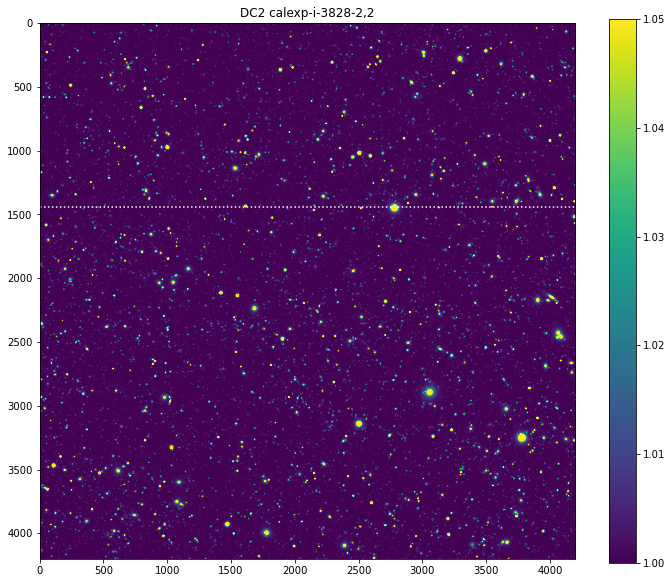

In [10]:
mplot.figure(figsize=(12,10))
mplot.imshow(np.log10(dc2_image[1].data+10))
mplot.colorbar()
mplot.title('DC2 calexp-i-3828-2,2')
mplot.plot([0,4200], [1440,1440], color='w', ls=':')
mplot.clim(1,1.05)
mplot.xlim(0,4200)

Let's zoom in a little.

(500.0, 1000.0)

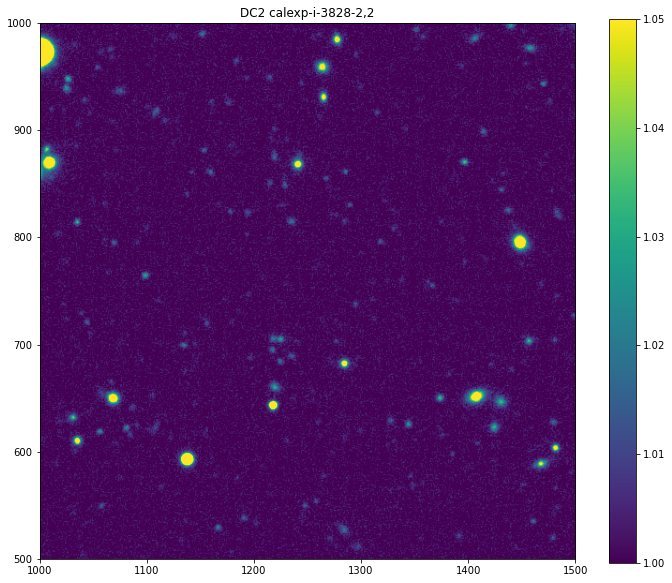

In [11]:
mplot.figure(figsize=(12,10))
mplot.imshow(np.log10(dc2_image[1].data+10))
mplot.colorbar()
mplot.title('DC2 calexp-i-3828-2,2')
mplot.plot([0,4200], [1440,1440], color='w', ls=':')
mplot.clim(1,1.05)
mplot.xlim(1000,1500)
mplot.ylim(500,1000)

You can take a look at a 1D slice through this bright star.

(-0.5, 1.0)

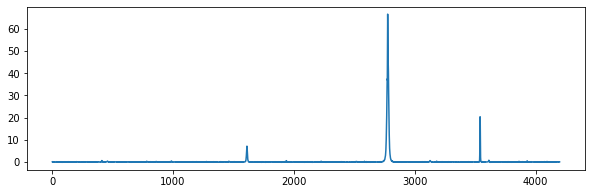

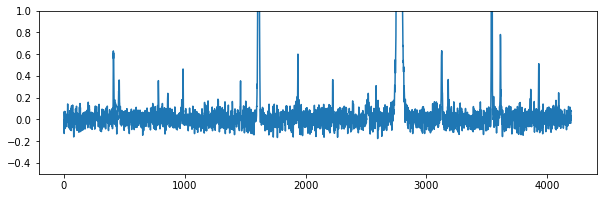

In [12]:
mplot.figure(figsize=(10,3))
mplot.plot(dc2_image[1].data[1440])
mplot.figure(figsize=(10,3))
mplot.plot(dc2_image[1].data[1440])
mplot.ylim(-0.5,1)

### Next let's look at a real coadd tile from DECam

### What do you find by comparing the two images?

### Now let's open a catalog from DC2

In [32]:
cat_dc2 = pd.read_parquet('data/object_dpdd_tract3828.parquet', engine='auto')

There are a lot of columns/information in these files!

In [44]:
for col in cat_dc2.columns:
    print(col)

I_flag
I_flag_g
I_flag_i
I_flag_r
I_flag_u
I_flag_y
I_flag_z
IxxPSF_pixel
IxxPSF_pixel_g
IxxPSF_pixel_i
IxxPSF_pixel_r
IxxPSF_pixel_u
IxxPSF_pixel_y
IxxPSF_pixel_z
Ixx_pixel
Ixx_pixel_g
Ixx_pixel_i
Ixx_pixel_r
Ixx_pixel_u
Ixx_pixel_y
Ixx_pixel_z
IxyPSF_pixel
IxyPSF_pixel_g
IxyPSF_pixel_i
IxyPSF_pixel_r
IxyPSF_pixel_u
IxyPSF_pixel_y
IxyPSF_pixel_z
Ixy_pixel
Ixy_pixel_g
Ixy_pixel_i
Ixy_pixel_r
Ixy_pixel_u
Ixy_pixel_y
Ixy_pixel_z
IyyPSF_pixel
IyyPSF_pixel_g
IyyPSF_pixel_i
IyyPSF_pixel_r
IyyPSF_pixel_u
IyyPSF_pixel_y
IyyPSF_pixel_z
Iyy_pixel
Iyy_pixel_g
Iyy_pixel_i
Iyy_pixel_r
Iyy_pixel_u
Iyy_pixel_y
Iyy_pixel_z
blendedness
cModelFluxErr_g
cModelFluxErr_i
cModelFluxErr_r
cModelFluxErr_u
cModelFluxErr_y
cModelFluxErr_z
cModelFlux_flag_g
cModelFlux_flag_i
cModelFlux_flag_r
cModelFlux_flag_u
cModelFlux_flag_y
cModelFlux_flag_z
cModelFlux_g
cModelFlux_i
cModelFlux_r
cModelFlux_u
cModelFlux_y
cModelFlux_z
clean
dec
extendedness
good
mag_g
mag_g_cModel
mag_i
mag_i_cModel
mag_r
mag_r_cModel
mag_u

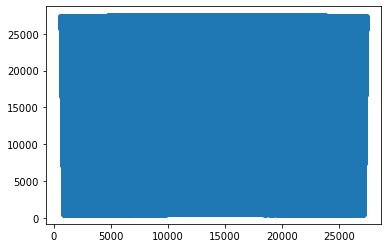

In [53]:
mplot.scatter(cat_dc2["x"], cat_dc2["y"])
# each track is a 8x8 grid, so the image above is just a 1/64 part of this

Let's plot the i-band magnitude distribution with and without flags.

Text(0, 0.5, '# of objects')

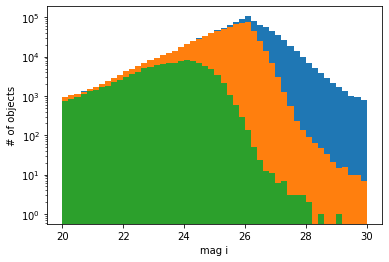

In [50]:
mplot.hist(cat_dc2["mag_i"], range=(20, 30), bins=50)
flag_all = (cat_dc2["I_flag"]==0)*(cat_dc2["I_flag_u"]==0)*(cat_dc2["I_flag_g"]==0)*(cat_dc2["I_flag_r"]==0)*(cat_dc2["I_flag_i"]==0)*(cat_dc2["I_flag_z"]==0)*(cat_dc2["I_flag_y"]==0)
mplot.hist(cat_dc2["mag_i"][cat_dc2["I_flag_i"]==0], range=(20, 30), bins=50)
mplot.hist(cat_dc2["mag_i"][flag_all], range=(20, 30), bins=50)
mplot.yscale('log')
mplot.xlabel('mag i')
mplot.ylabel('# of objects')


### Now do the same for the DES tile

### What do you find by comparing the two images?